In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1391,ham,"Haha just kidding, papa needs drugs",NaN,NaN,NaN
4343,ham,Hi:)did you asked to waheeda fathima about leave?,NaN,NaN,NaN
1123,ham,Good morning princess! How are you?,NaN,NaN,NaN
3093,ham,Have you emigrated or something? Ok maybe 5.30...,NaN,NaN,NaN
1583,ham,"It's cool, let me know before it kicks off aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4622,ham,U need my presnts always bcz U cant mis love. ...
1436,ham,I jus hope its true that missin me cos i'm re...
2491,ham,"Greetings me, ! Consider yourself excused."
1403,ham,cool. We will have fun practicing making babies!
3860,spam,Free Msg: Ringtone!From: http://tms. widelive....


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3678,ham,Stupid.its not possible
1076,ham,Where can download clear movies. Dvd copies.
1918,ham,Is fujitsu s series lifebook good?
4481,ham,What do u reckon as need 2 arrange transport i...
1797,ham,Can i get your opinion on something first?


In [10]:
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

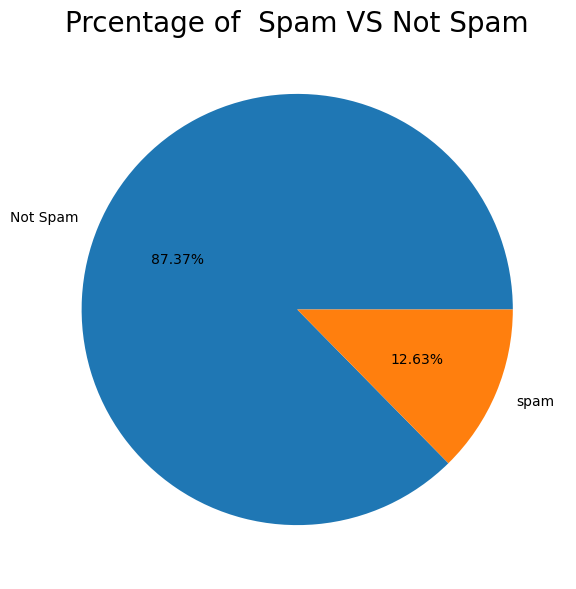

In [20]:
plt.figure(figsize=(15,7))
plt.pie(df['target'].value_counts(), labels=['Not Spam','spam'],autopct="%0.2f%%")
plt.title('Prcentage of  Spam VS Not Spam',size=20)
plt.show()

In [21]:
# Data is imbalanced

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sukh-e\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.454246,1.948152
std,58.175349,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.120903,1.799601
std,56.357463,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.975498
std,30.014336,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


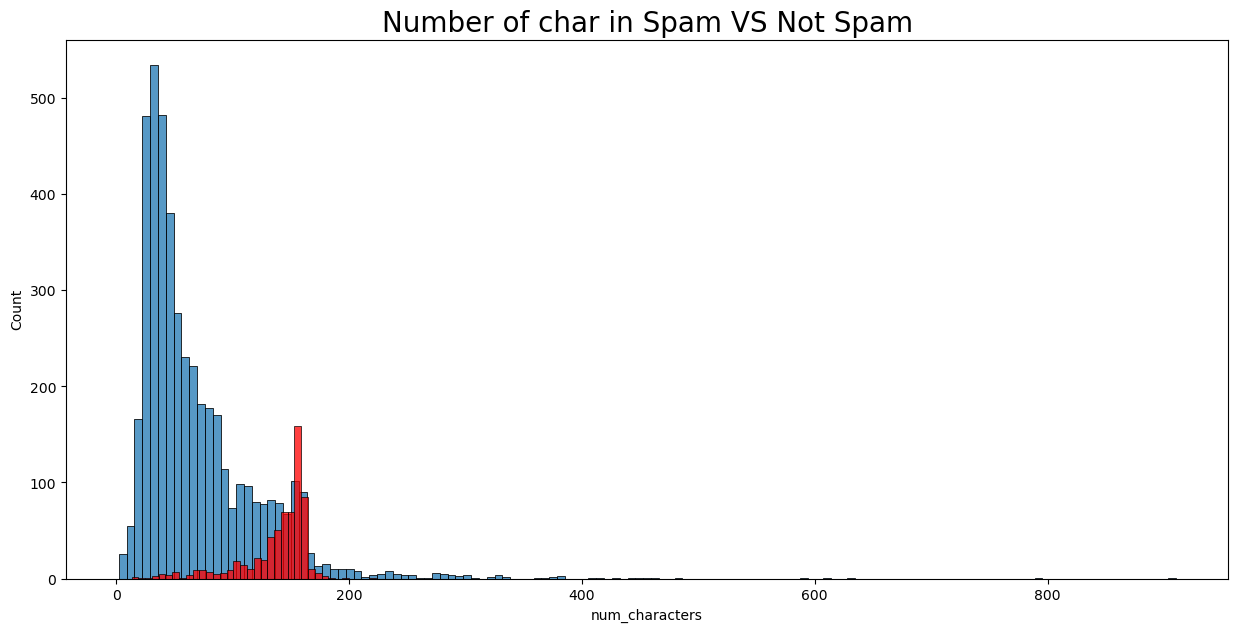

In [32]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.title('Number of char in Spam VS Not Spam',size=20)
plt.show()

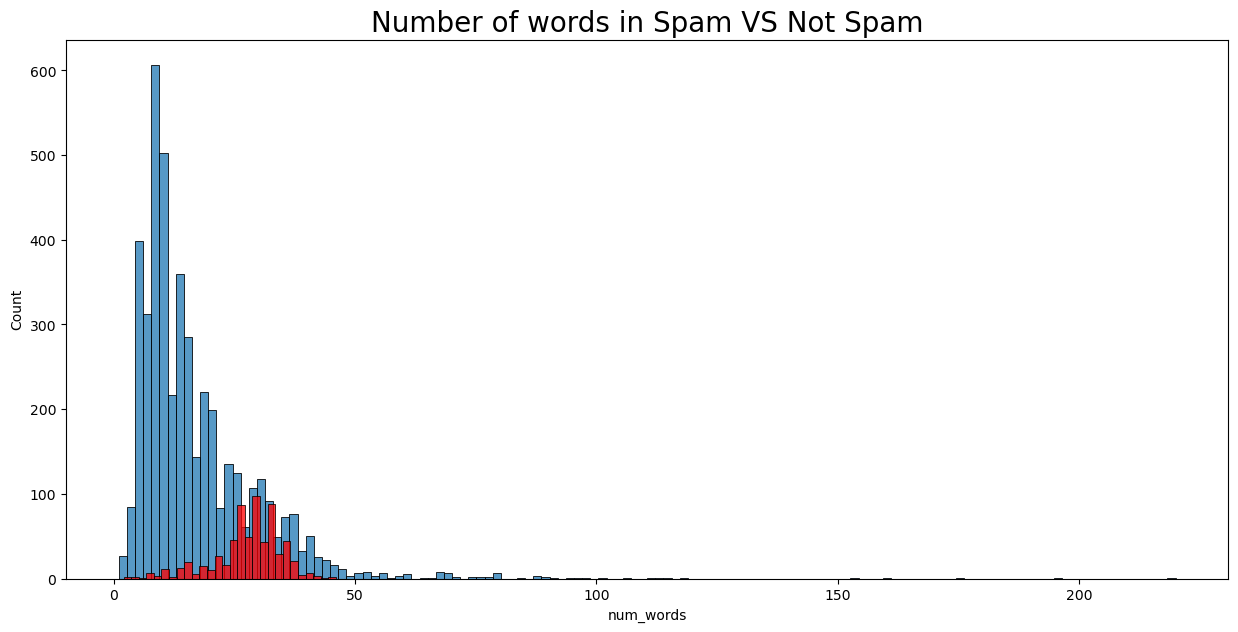

In [33]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.title('Number of words in Spam VS Not Spam',size=20)
plt.show()

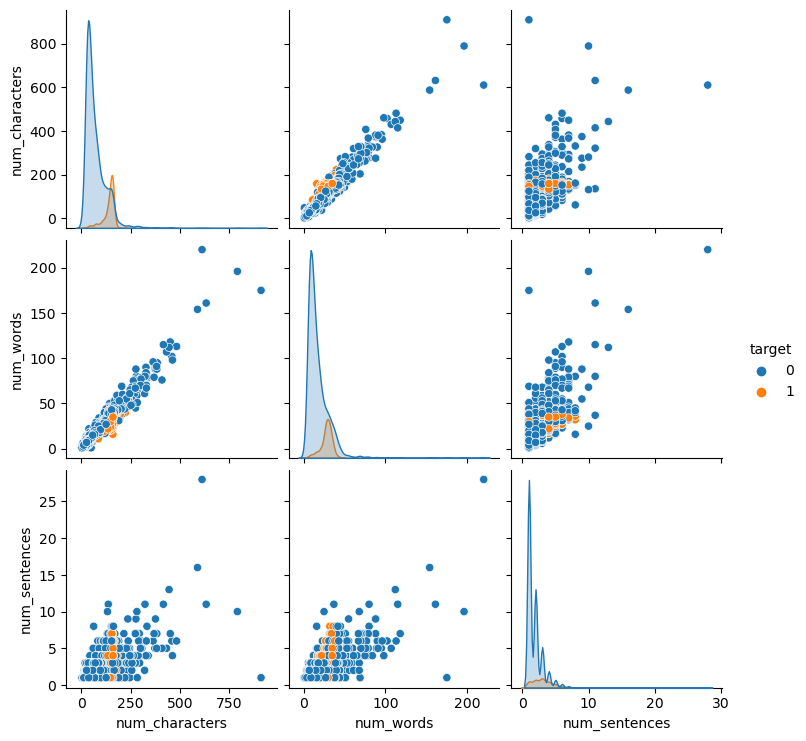

In [34]:
sns.pairplot(df,hue='target')
plt.show()

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [35]:
ps = PorterStemmer()
ps.stem('loving')

'love'

In [36]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [37]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [38]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

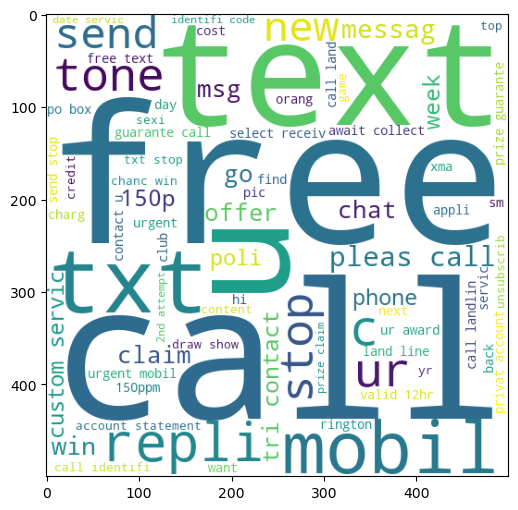

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

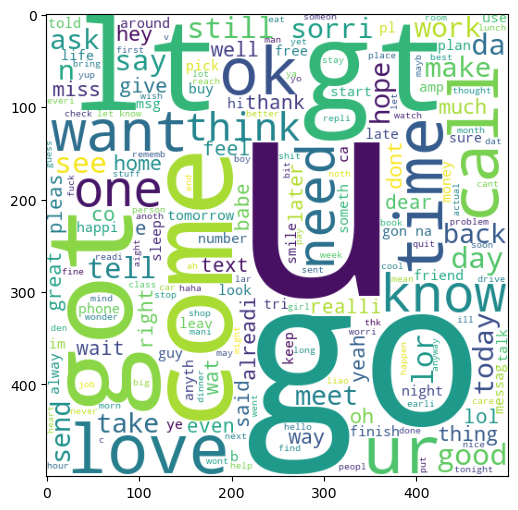

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9941

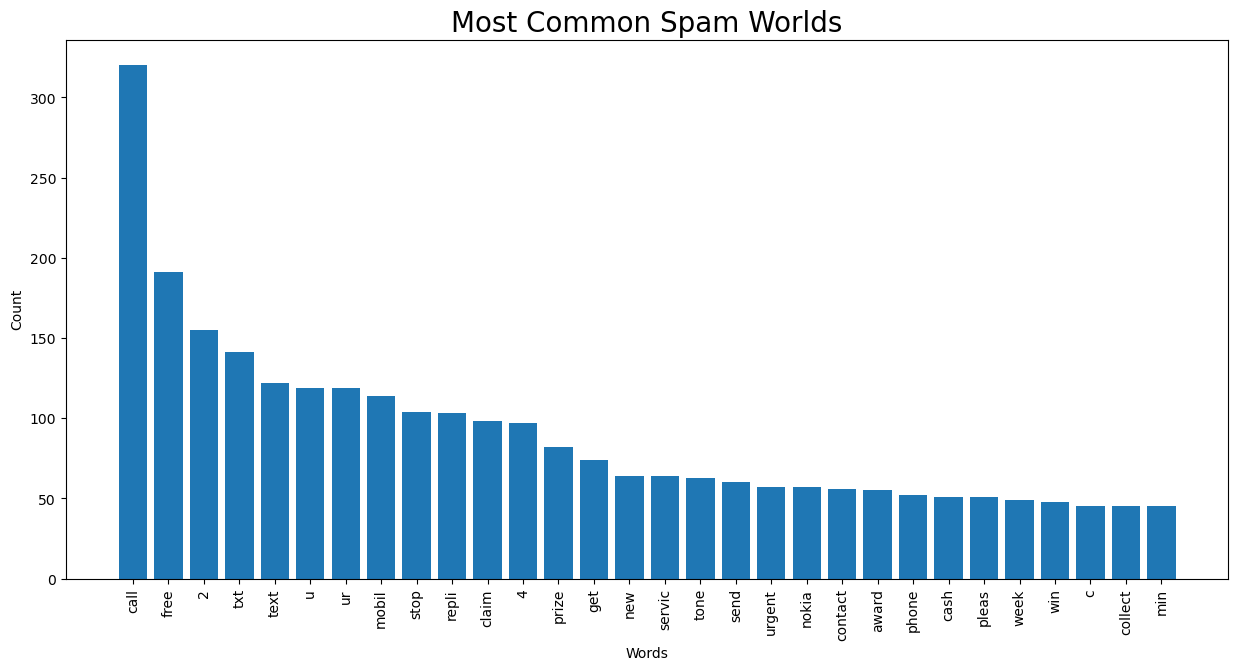

In [50]:
from collections import Counter
plt.figure(figsize=(15,7))
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Most Common Spam Worlds',size=20)
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [51]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35295

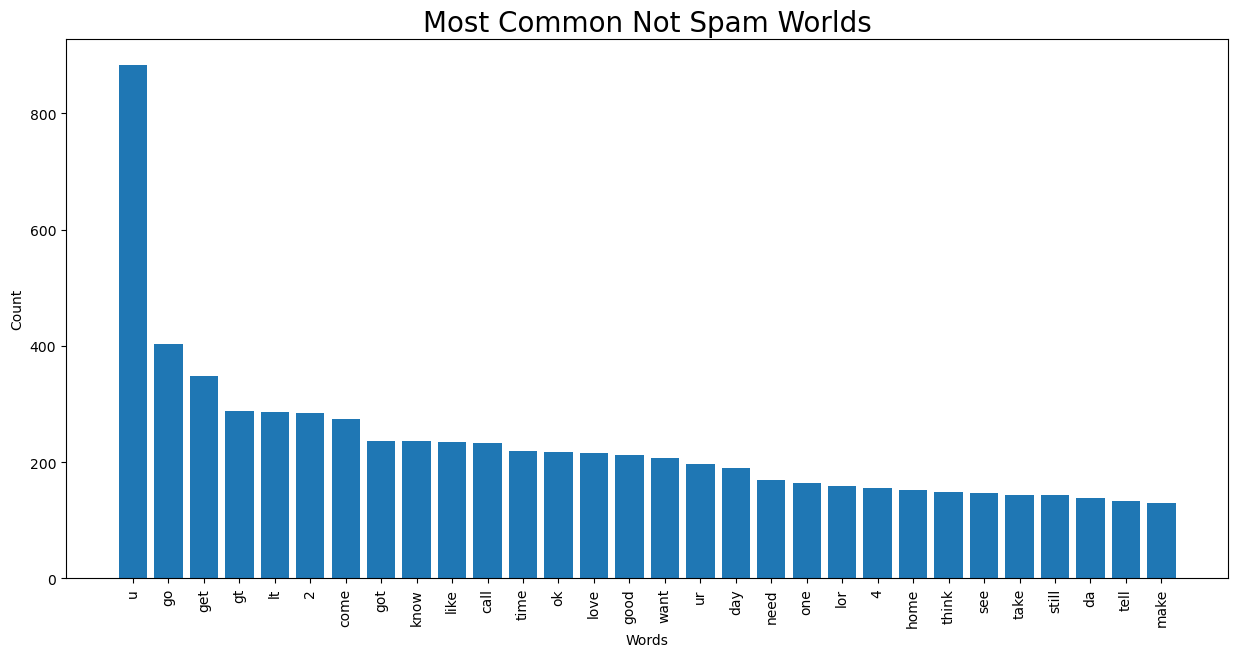

In [53]:
from collections import Counter
plt.figure(figsize=(15,7))
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Most Common Not Spam Worlds',size=20)
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [54]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [56]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
X.shape

(5169, 3000)

In [58]:
Y = df['target'].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
gaussian_nb = GaussianNB()
multinomianb = MultinomialNB()
bernoullinb = BernoulliNB()

In [63]:
gaussian_nb.fit(X_train,Y_train)
predictions = gaussian_nb.predict(X_test)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.81      0.63       138

    accuracy                           0.87      1034
   macro avg       0.74      0.85      0.77      1034
weighted avg       0.91      0.87      0.88      1034



In [64]:
print(confusion_matrix(Y_test,predictions))

[[788 108]
 [ 26 112]]


In [65]:
multinomianb.fit(X_train,Y_train)
predictions = gaussian_nb.predict(X_test)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.81      0.63       138

    accuracy                           0.87      1034
   macro avg       0.74      0.85      0.77      1034
weighted avg       0.91      0.87      0.88      1034



In [66]:
bernoullinb.fit(X_train,Y_train)
predictions = gaussian_nb.predict(X_test)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.81      0.63       138

    accuracy                           0.87      1034
   macro avg       0.74      0.85      0.77      1034
weighted avg       0.91      0.87      0.88      1034



In [67]:
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(n_estimators=50, random_state=2)
random_model.fit(X_train,Y_train)
predictions = random_model.predict(X_test)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.98      0.83      0.90       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.98      0.98      0.97      1034



In [68]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(random_model,open('model.pkl','wb'))

In [69]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(multinomianb,open('model.pkl','wb'))